In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from datetime import datetime as dt
import matplotlib.pyplot as plt

In [2]:
customer= pd.read_csv("/Users/z001bln/Desktop/StudyMaterial/AnalytixLab/Assignments/Pandas Case Study 2 - Credit Card Case Study/Customer Acqusition.csv")
spend= pd.read_csv("/Users/z001bln/Desktop/StudyMaterial/AnalytixLab/Assignments/Pandas Case Study 2 - Credit Card Case Study/spend.csv")
#repayment= pd.read_excel("/Users/z001bln/Desktop/StudyMaterial/AnalytixLab/Assignments/Pandas Case Study 2 - Credit Card Case Study/Credit Card Data.xlsx", sheet_name="Repayment")
repayment= pd.read_csv("/Users/z001bln/Desktop/StudyMaterial/AnalytixLab/Assignments/Pandas Case Study 2 - Credit Card Case Study/Repayment.csv")
display(customer.head())
display(spend.head())
display(repayment.head())


,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,03-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


,SL No:,Customer,Month,Amount
0,1,A1,12-Jan-04,495414.75
1,2,A1,03-Jan-04,245899.02
2,3,A1,15-Jan-04,259490.06
3,4,A1,25-Jan-04,437555.12
4,5,A1,17-Jan-05,165972.88


In [3]:
# No of records in each df
display(customer.shape)
display(spend.shape)
display(repayment.shape)


(100, 8)

(1500, 5)

(1500, 4)

# Data Proprocessing

In [4]:
# Convert the float age to int
customer.Age= customer.Age.astype(int)
customer.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [5]:
#a. In case age is less than 18, replace it with mean of age values.
customer.loc[customer.Age < 18 , 'Age' ] = customer.Age.mean()


In [6]:
customer.head(20)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71.00,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34.00,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47.00,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56.00,BANGALORE,Platimum,10002.0,C5,Normal Salary
5,6,A6,70.00,DELHI,Silver,100000.0,C6,Self Employed
6,7,A7,26.00,COCHIN,Silver,100001.0,C7,Salaried_MNC
7,8,A8,67.00,PATNA,Silver,100002.0,C8,Salaried_Pvt
8,9,A9,79.00,CHENNAI,Silver,100003.0,C9,Govt
9,10,A10,54.00,CALCUTTA,Gold,500000.0,C10,Normal Salary


In [7]:
#b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. (customer’s limit provided in acquisition table is the per transaction limit on his card)

    # 1. Merge the dataframe 
customer_spend= pd.merge(left=customer, right = spend , how ='inner', on= 'Customer')
customer_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,03-Jan-04,PETRO,410556.13
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07


In [8]:
customer_spend.loc[customer_spend.Amount > customer_spend.Limit, 'Amount'] = customer_spend.Limit*50/100
customer_spend

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,03-Jan-04,PETRO,410556.13
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,25-Jan-04,BIKE,54729.66
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,AUTO,5000.00
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,03-Jan-04,SHOPPING,5000.50
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,5001.00


In [9]:
# to cross verify if  In case spend amount is more than the limit 
customer_spend.loc[customer_spend.Amount > customer_spend.Limit]

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount


In [10]:
# c. Incase the repayment amount is more than the limit, replace the repayment with the limit.  
    # now merge the repayment Df as well after removing NaNs and dropping duplicate cols.
customer_spend=customer_spend.drop(columns= 'Sl No:').reset_index(drop= True)
customer_spend

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,03-Jan-04,PETRO,410556.13
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,CLOTHES,23740.46
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,FOOD,484342.47
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,25-Jan-04,BIKE,54729.66
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,AUTO,5000.00
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,03-Jan-04,SHOPPING,5000.50
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,AIR TICKET,5001.00


In [11]:
repayment= repayment.dropna().reset_index(drop= True)
repayment

,SL No:,Customer,Month,Amount
0,1,A1,12-Jan-04,495414.75
1,2,A1,03-Jan-04,245899.02
2,3,A1,15-Jan-04,259490.06
3,4,A1,25-Jan-04,437555.12
4,5,A1,17-Jan-05,165972.88
...,...,...,...,...
1495,1496,A67,09-May-05,55638.77
1496,1497,A68,10-May-06,319836.49
1497,1498,A69,11-Jul-06,247628.45
1498,1499,A70,12-Aug-05,454016.51


In [12]:
cust_transactions= pd.merge(left=customer_spend, right= repayment, on=['Customer'], how= 'inner' )
cust_transactions

,No,Customer,Age,City,Product,Limit,Company,Segment,Month_x,Type,Amount_x,SL No:,Month_y,Amount_y
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,1,12-Jan-04,495414.75
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,2,03-Jan-04,245899.02
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,3,15-Jan-04,259490.06
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,4,25-Jan-04,437555.12
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,5,17-Jan-05,165972.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37279,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,25-Jan-04,BIKE,54729.66,98,25-Jan-04,310992.30
37280,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,AUTO,5000.00,99,12-Jan-04,121874.90
37281,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,03-Jan-04,SHOPPING,5000.50,100,03-Jan-04,337815.57
37282,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,AIR TICKET,5001.00,101,15-Jan-04,25682.73


In [13]:
cust_transactions.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Month_x,Type,Amount_x,SL No:,Month_y,Amount_y
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,1,12-Jan-04,495414.75
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,2,03-Jan-04,245899.02
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,3,15-Jan-04,259490.06
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,4,25-Jan-04,437555.12
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,5,17-Jan-05,165972.88


In [14]:
cust_transactions= cust_transactions.drop(columns=['No','SL No:'])
cust_transactions.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month_x,Type,Amount_x,Month_y,Amount_y
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,12-Jan-04,495414.75
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,03-Jan-04,245899.02
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,15-Jan-04,259490.06
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,25-Jan-04,437555.12
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,17-Jan-05,165972.88


In [15]:
cust_transactions= cust_transactions.rename(columns= {'Month_x':'Month_spend','Month_y':'Month_payment','Amount_x':'spend_amount','Amount_y':'repay_amount'})
cust_transactions

,Customer,Age,City,Product,Limit,Company,Segment,Month_spend,Type,spend_amount,Month_payment,repay_amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,12-Jan-04,495414.75
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,03-Jan-04,245899.02
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,15-Jan-04,259490.06
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,25-Jan-04,437555.12
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,17-Jan-05,165972.88
...,...,...,...,...,...,...,...,...,...,...,...,...
37279,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,25-Jan-04,BIKE,54729.66,25-Jan-04,310992.30
37280,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,AUTO,5000.00,12-Jan-04,121874.90
37281,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,03-Jan-04,SHOPPING,5000.50,03-Jan-04,337815.57
37282,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,AIR TICKET,5001.00,15-Jan-04,25682.73


In [16]:
# c. Incase the repayment amount is more than the limit, replace the repayment with the limit.
cust_transactions.loc[cust_transactions.repay_amount > cust_transactions.Limit,'repay_amount' ]= cust_transactions.Limit


In [17]:
# to cross check:
cust_transactions.loc[cust_transactions.repay_amount > cust_transactions.Limit]

,Customer,Age,City,Product,Limit,Company,Segment,Month_spend,Type,spend_amount,Month_payment,repay_amount


# 2. From the above dataset create the following summaries: a. How many distinct customers exist?
    a. How many distinct customers exist?
    b. How many distinct categories exist?
    c. What is the average monthly spend by customers?
    d. What is the average monthly repayment by customers?
    e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment – Monthly spend. Interest is earned only on positive profits and not on negative amounts)
  
    f. What are the top 5 product types?
    g. Which city is having maximum spend?
    h. Which age group is spending more money?
    i. Who are the top 10 customers in terms of repayment?


In [18]:
# a. How many distinct customers exist?
print("Count of distinct customers: ",cust_transactions.Customer.unique().size)

# b. How many distinct categories exist?
print("Count of distinct product categories: ",cust_transactions.Product.unique().size,"and type categories: ", cust_transactions.Type.unique().size)


Count of distinct customers:  100
Count of distinct product categories:  3 and type categories:  15


In [19]:
#c. What is the average monthly spend by customers?
customer_spend['mnth_yr'] = pd.to_datetime(customer_spend['Month']).apply(lambda x: x.strftime('%m-%y')) 
customer_spend

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,mnth_yr
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,01-04
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,03-Jan-04,PETRO,410556.13,01-04
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,CLOTHES,23740.46,01-04
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,FOOD,484342.47,01-04
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,CAMERA,369694.07,01-05
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,25-Jan-04,BIKE,54729.66,01-04
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,AUTO,5000.00,01-04
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,03-Jan-04,SHOPPING,5000.50,01-04
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,AIR TICKET,5001.00,01-04


In [20]:
round(customer_spend.groupby(by= ['Customer','mnth_yr'])[['Amount']].mean().add_prefix("avg_monthly_"),2)

avg_monthly_Amount
Customer mnth_yr                    
A1       01-04             373274.01
         01-05             369694.07
         02-04              52208.65
         02-05             205992.45
         04-06             261649.25
...                              ...
A95      01-04             240401.50
A96      01-04              54729.66
A97      01-04               5000.00
A98      01-04               5000.50
A99      01-04               5001.00

[807 rows x 1 columns]

In [21]:
#d. What is the average monthly repayment by customers?
cust_repay= pd.merge(left=customer, right = repayment , how ='inner', on= 'Customer')
cust_repay= cust_repay.drop(columns= ['No','SL No:']).reset_index()
cust_repay.Month=pd.to_datetime(cust_repay.Month)
cust_repay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 10 columns):
index       1500 non-null int64
Customer    1500 non-null object
Age         1500 non-null float64
City        1500 non-null object
Product     1500 non-null object
Limit       1500 non-null float64
Company     1500 non-null object
Segment     1500 non-null object
Month       1500 non-null datetime64[ns]
Amount      1500 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 117.3+ KB


In [22]:
cust_repay['mnth_yr']= cust_repay['Month'].apply(lambda x: x.strftime('%m-%y'))
cust_repay.head()

,index,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount,mnth_yr
0,0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75,01-04
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02,01-04
2,2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06,01-04
3,3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12,01-04
4,4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88,01-05


In [23]:
round(cust_repay.groupby(by= ['Customer','mnth_yr'])[['Amount']].mean().add_prefix("avg_monthly_repayment_"),2)

avg_monthly_repayment_Amount
Customer mnth_yr                              
A1       01-04                       373638.90
         01-05                       165972.88
         02-04                       117964.43
         02-05                       165977.34
         04-06                       254474.58
...                                        ...
A95      01-04                       369405.96
A96      01-04                       310992.30
A97      01-04                       121874.90
A98      01-04                       337815.57
A99      01-04                        25682.73

[798 rows x 1 columns]

In [24]:
# e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? 
#(Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment – Monthly spend. 
#Interest is earned only on positive profits and not on negative amounts)
cust_transactions.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month_spend,Type,spend_amount,Month_payment,repay_amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,12-Jan-04,495414.75
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,03-Jan-04,245899.02
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,15-Jan-04,259490.06
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,25-Jan-04,437555.12
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,17-Jan-05,165972.88


In [25]:
cust_transactions['Profit']= cust_transactions['repay_amount']- cust_transactions['spend_amount']
cust_transactions

,Customer,Age,City,Product,Limit,Company,Segment,Month_spend,Type,spend_amount,Month_payment,repay_amount,Profit
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,12-Jan-04,495414.75,9943.95
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,03-Jan-04,245899.02,-239571.78
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,15-Jan-04,259490.06,-225980.74
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,25-Jan-04,437555.12,-47915.68
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,17-Jan-05,165972.88,-319497.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37279,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,25-Jan-04,BIKE,54729.66,25-Jan-04,100000.00,45270.34
37280,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,AUTO,5000.00,12-Jan-04,10000.00,5000.00
37281,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,03-Jan-04,SHOPPING,5000.50,03-Jan-04,10001.00,5000.50
37282,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,AIR TICKET,5001.00,15-Jan-04,10002.00,5001.00


In [26]:
cust_transactions['Profit'] = round(cust_transactions.Profit[cust_transactions.Profit > 0]*2.9/100,2) 
cust_transactions.head()


,Customer,Age,City,Product,Limit,Company,Segment,Month_spend,Type,spend_amount,Month_payment,repay_amount,Profit
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,12-Jan-04,495414.75,288.37
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,03-Jan-04,245899.02,NaN
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,15-Jan-04,259490.06,NaN
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,25-Jan-04,437555.12,NaN
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,17-Jan-05,165972.88,NaN


In [27]:
# f. What are the top 5 product types?
spend.groupby(by= 'Type')[['Amount']].sum().sort_values('Amount', ascending= False).head(5)


,Amount
Type,
PETRO,49863174.09
CAMERA,41481571.96
FOOD,37773338.43
TRAIN TICKET,33067077.15
AIR TICKET,32955445.42


In [28]:
# g. Which city is having maximum spend?
customer_spend.groupby(by= 'City')[['Amount']].sum().sort_values('Amount', ascending= False).head(1)

,Amount
City,
COCHIN,45963513.5


In [29]:
# h. Which age group is spending more money?
customer_spend.groupby(by= 'Age')[['Amount']].sum().sort_values('Amount', ascending= False)

,Amount
Age,
28.00,17365270.23
46.49,15872551.38
78.00,12329508.54
37.00,9992645.71
25.00,9749700.72
51.00,9670808.79
47.00,9157809.12
44.00,9002326.39
29.00,8231607.26


In [30]:
# i. Who are the top 10 customers in terms of repayment?
repayment.groupby(by= 'Customer')[['Amount']].sum().sort_values('Amount', ascending= False).head(10)

,Amount
Customer,
A61,10539142.91
A60,9876290.74
A13,9572000.66
A22,9372561.68
A21,9056336.15
A43,8489871.46
A45,8448334.87
A12,8334760.16
A48,8292416.75


# 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [31]:
customer_spend.groupby(by= ['City','Month'])[['Amount']].sum()

Amount
City       Month                
BANGALORE  01-Apr-06   341157.43
           01-Feb-05  1345521.78
           01-Jun-05    50235.89
           02-Apr-06   226373.32
           02-Jun-05   490863.68
...                          ...
TRIVANDRUM 29-Mar-06   421353.88
           29-May-05    55001.00
           30-Apr-06     5000.50
           31-Mar-06   830861.93
           31-May-05     3411.29

[489 rows x 1 columns]

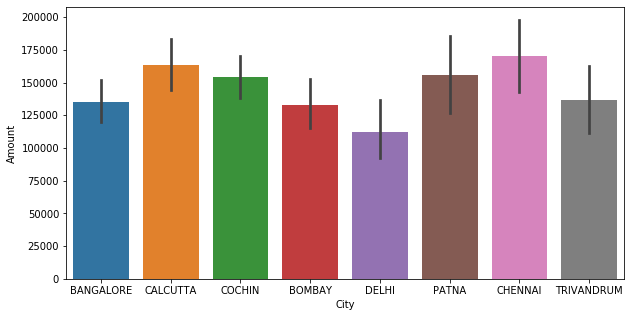

In [32]:
plt.figure(figsize=(10,5))
sns.barplot(x=customer_spend.City, y=customer_spend.Amount)
plt.show()

# 4. Create graphs for
    a. Monthly comparison of total spends, city wise
    b. Comparison of yearly spend on air tickets
    c. Comparison of monthly spend for each product (look for any seasonality
       that exists in terms of spend)

In [33]:
customer_spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 12 columns):
No          1500 non-null int64
Customer    1500 non-null object
Age         1500 non-null float64
City        1500 non-null object
Product     1500 non-null object
Limit       1500 non-null float64
Company     1500 non-null object
Segment     1500 non-null object
Month       1500 non-null object
Type        1500 non-null object
Amount      1500 non-null float64
mnth_yr     1500 non-null object
dtypes: float64(3), int64(1), object(8)
memory usage: 140.8+ KB


In [34]:
customer_spend.Month= pd.to_datetime(customer_spend.Month)
customer_spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 12 columns):
No          1500 non-null int64
Customer    1500 non-null object
Age         1500 non-null float64
City        1500 non-null object
Product     1500 non-null object
Limit       1500 non-null float64
Company     1500 non-null object
Segment     1500 non-null object
Month       1500 non-null datetime64[ns]
Type        1500 non-null object
Amount      1500 non-null float64
mnth_yr     1500 non-null object
dtypes: datetime64[ns](1), float64(3), int64(1), object(7)
memory usage: 140.8+ KB


In [35]:
customer_spend.head(20)

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,mnth_yr
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,01-04
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,01-04
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46,01-04
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47,01-04
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07,01-05
5,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-02-23,SANDALS,168285.60,02-05
6,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-02-01,CAR,23370.20,02-05
7,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,TRAIN TICKET,440563.22,01-04
8,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-02-05,BUS TICKET,52208.65,02-04
9,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2006-04-19,AIR TICKET,346925.68,04-06


In [36]:
customer_spend['mnth_yr'] = customer_spend['Month'].apply(lambda x: x.strftime('%m-%y')) 

In [37]:
customer_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,mnth_yr
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,01-04
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,01-04
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46,01-04
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47,01-04
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07,01-05


In [38]:
res=customer_spend.groupby(by= ['City','mnth_yr'])[['Amount']].sum().reset_index()
res

,City,mnth_yr,Amount
0,BANGALORE,01-04,8662102.77
1,BANGALORE,01-05,374694.07
2,BANGALORE,01-06,5000.00
3,BANGALORE,02-04,535939.92
4,BANGALORE,02-05,5461325.81
...,...,...,...
207,TRIVANDRUM,11-04,14366.69
208,TRIVANDRUM,11-05,115264.41
209,TRIVANDRUM,11-06,13756.30
210,TRIVANDRUM,12-05,302913.55


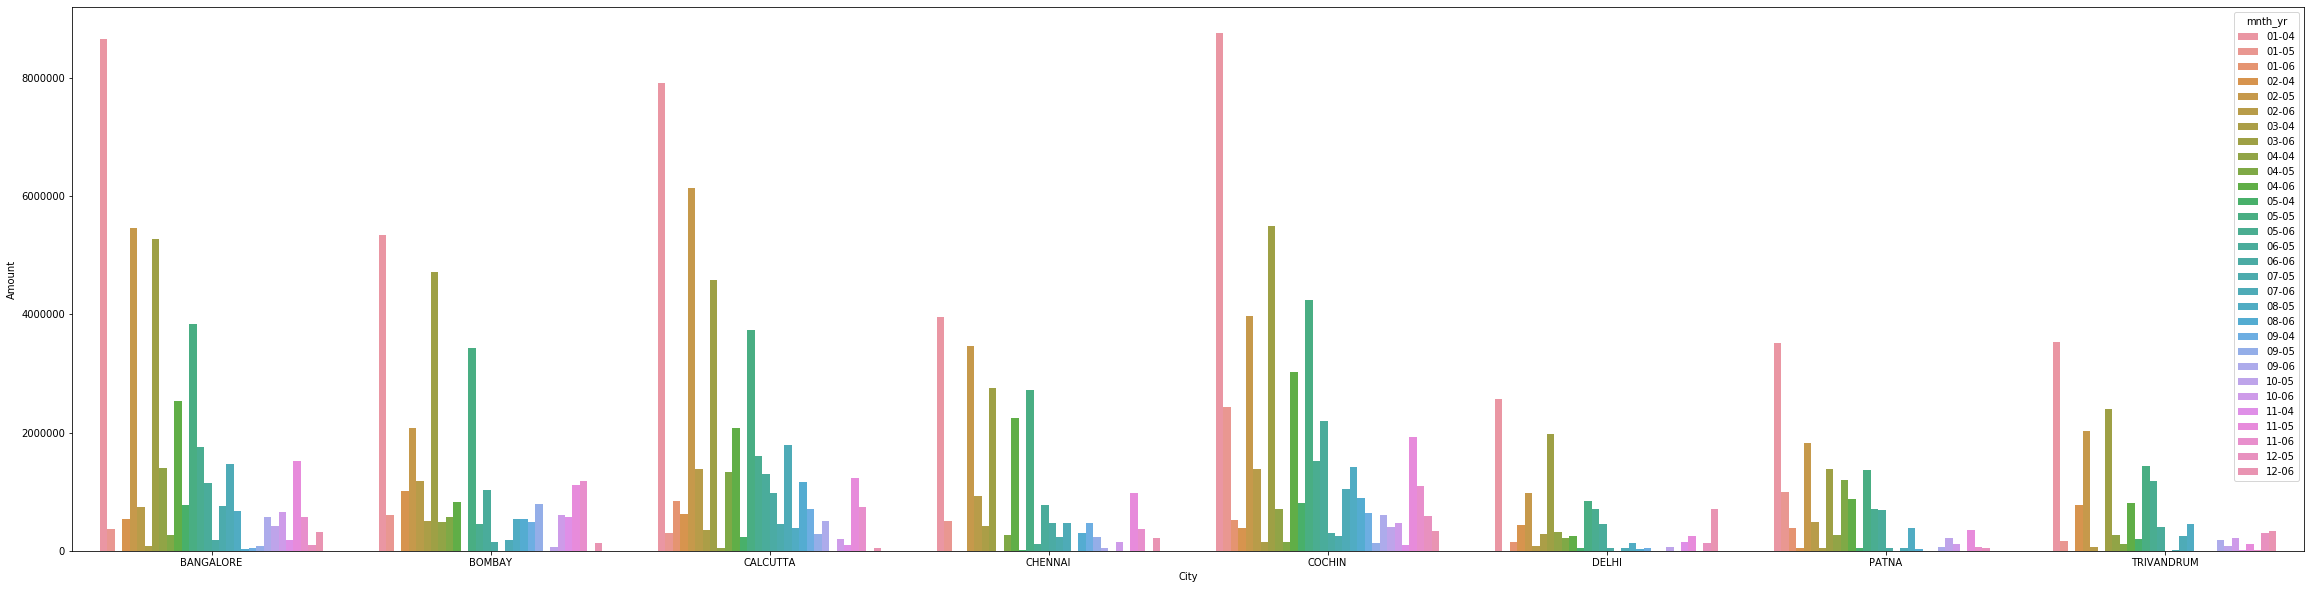

In [55]:
plt.figure(figsize=(40,10))
sns.barplot(x=res.City, y=res.Amount, hue=res.mnth_yr, data=res)
plt.show()

In [40]:
#Comparison of yearly spend on air tickets
customer_spend['year']= customer_spend['Month'].apply(lambda x: x.strftime('%y'))

customer_spend

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,mnth_yr,year
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,01-04,04
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,01-04,04
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46,01-04,04
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47,01-04,04
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07,01-05,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,BIKE,54729.66,01-04,04
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,AUTO,5000.00,01-04,04
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,SHOPPING,5000.50,01-04,04
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,AIR TICKET,5001.00,01-04,04


In [41]:
customer_spend[customer_spend.Type == 'AIR TICKET']

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,mnth_yr,year
9,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2006-04-19,AIR TICKET,346925.68,04-06,06
63,5,A5,56.0,BANGALORE,Platimum,10002.0,C5,Normal Salary,2006-03-03,AIR TICKET,5001.00,03-06,06
80,6,A6,70.0,DELHI,Silver,100000.0,C6,Self Employed,2006-04-03,AIR TICKET,50000.00,04-06,06
97,7,A7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC,2006-05-03,AIR TICKET,50000.50,05-06,06
115,8,A8,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt,2006-06-03,AIR TICKET,50001.00,06-06,06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1474,75,A75,36.0,BOMBAY,Silver,100003.0,C37,Self Employed,2005-02-23,AIR TICKET,50001.50,02-05,05
1475,76,A76,66.0,BANGALORE,Silver,500000.0,C38,Self Employed,2005-02-03,AIR TICKET,30066.44,02-05,05
1476,77,A77,35.0,BANGALORE,Silver,500000.0,C39,Self Employed,2006-02-04,AIR TICKET,31048.93,02-06,06
1483,84,A84,70.0,PATNA,Silver,100000.0,C7,Govt,2006-03-27,AIR TICKET,50000.00,03-06,06


In [42]:
t= customer_spend[customer_spend.Type == 'AIR TICKET'].groupby(by= ['City','year'])[['Amount']].sum().reset_index()
y= customer_spend[customer_spend.Type == 'AIR TICKET'].groupby(by= ['year'])[['Amount']].sum().reset_index()

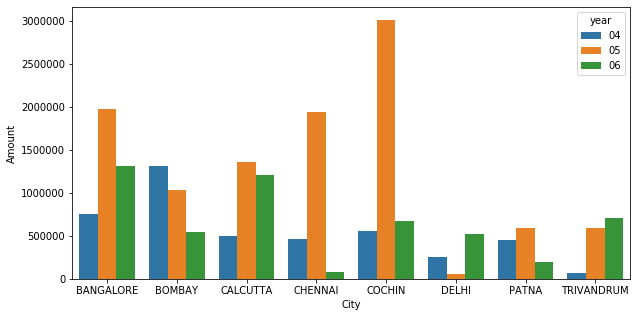

In [43]:
#city wise:
plt.figure(figsize=(10,5))
sns.barplot(x=t.City, y=t.Amount, hue=t.year, data=t, saturation=0.8)
plt.show()

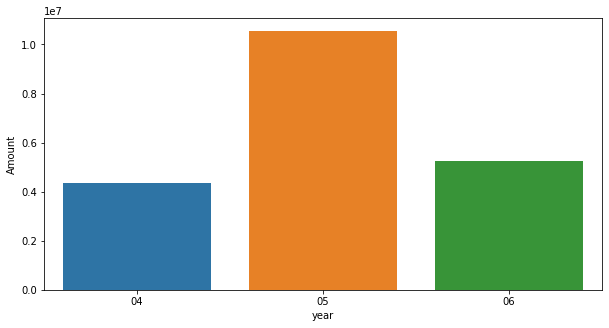

In [44]:
#total:
plt.figure(figsize=(10,5))
sns.barplot(x='year', y='Amount', data=y, saturation=0.8)
plt.show()

In [45]:
# c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)
z= customer_spend.groupby(by= ['Type','mnth_yr'])[['Amount']].sum().add_prefix('Total_spent_').reset_index()

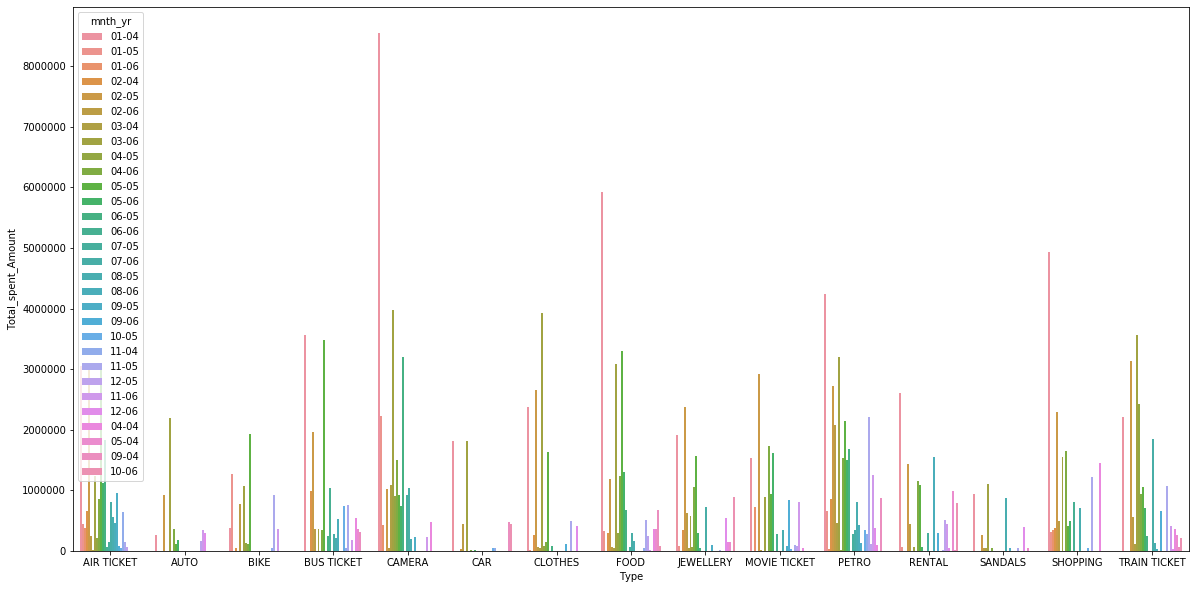

In [46]:
plt.figure(figsize=(20,10))
sns.barplot(x=z.Type, y=z.Total_spent_Amount, hue= z.mnth_yr, data=z, saturation=0.8)
plt.show()

In [56]:
# 5. Write user defined PYTHON function to perform the following analysis:
# You need to find top 10 customers for each city in terms of their repayment amount by different products and by 
# different time periods i.e. year or month. 
# The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) 
# and the function should automatically take these inputs while identifying the top 10 customers.

In [57]:
cust_repay

,index,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount,mnth_yr
0,0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75,01-04
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02,01-04
2,2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06,01-04
3,3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12,01-04
4,4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88,01-05
...,...,...,...,...,...,...,...,...,...,...,...
1495,1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,310992.30,01-04
1496,1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,121874.90,01-04
1497,1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,337815.57,01-04
1498,1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,25682.73,01-04


In [60]:
cust_repay['yearly']=cust_repay.Month.apply(lambda x:x.year)
cust_repay['monthly']=cust_repay.Month.apply(lambda x:x.month)  

In [61]:
cust_repay

,index,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount,mnth_yr,yearly,monthly
0,0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75,01-04,2004,1
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02,01-04,2004,1
2,2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06,01-04,2004,1
3,3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12,01-04,2004,1
4,4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88,01-05,2005,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,310992.30,01-04,2004,1
1496,1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,121874.90,01-04,2004,1
1497,1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,337815.57,01-04,2004,1
1498,1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,25682.73,01-04,2004,1


In [64]:
def top_ten_customers(product_category,time_period):
    return cust_repay.loc[(cust_repay.Product == product_category)].groupby(
        ['Customer','City','Product',time_period]).Amount.sum().reset_index().sort_values('Amount',ascending=False).head(10)

In [65]:
product_category=str(input("Please Enter Product Category and product category should be in Gold/Silver/Platinum: "))
time_period=str(input("Please Enter Time Period and time period should be in yearly/monthly: "))

Please Enter Product Category and product category should be in Gold/Silver/Platinum: Gold
Please Enter Time Period and time period should be in yearly/monthly: yearly


In [68]:
top_ten_customers_analysis=top_ten_customers(product_category,time_period)
print("Top 10 customer analysis is: ")
top_ten_customers_analysis

Top 10 customer analysis is: 


,Customer,City,Product,yearly,Amount
64,A61,COCHIN,Gold,2005,4276860.55
55,A44,DELHI,Gold,2005,4165317.77
58,A45,COCHIN,Gold,2005,4042447.57
52,A43,BANGALORE,Gold,2005,4006956.60
13,A13,BANGALORE,Gold,2005,3757673.00
65,A61,COCHIN,Gold,2006,3744127.41
61,A60,CALCUTTA,Gold,2005,3742856.10
14,A13,BANGALORE,Gold,2006,3477314.89
38,A29,CALCUTTA,Gold,2006,3434298.00
35,A28,TRIVANDRUM,Gold,2006,3376614.65
